# Training Samples Visualization

This notebook visualizes a grid of random samples from the CelebA training dataset used in CMU 10799: Diffusion and Flow Matching.

The dataset consists of 64×64 pixel celebrity face images that will be used for training diffusion models.

## Import Required Libraries

Import necessary libraries including torch, torchvision, matplotlib, numpy, and HuggingFace datasets.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
import random

print("Libraries imported successfully!")

Libraries imported successfully!


## Load the Dataset

Load the CelebA subset dataset from HuggingFace Hub. The dataset will be cached locally for faster access on subsequent runs.

In [2]:
print("Loading CelebA dataset from HuggingFace Hub...")
print("This may take a moment on first run as the dataset is downloaded and cached.")

dataset = load_dataset("electronickale/cmu-10799-celeba64-subset")
train_dataset = dataset["train"]

print(f"\nDataset loaded successfully!")
print(f"Number of training samples: {len(train_dataset)}")
print(f"Dataset features: {train_dataset.features}")

Loading CelebA dataset from HuggingFace Hub...
This may take a moment on first run as the dataset is downloaded and cached.



Dataset loaded successfully!
Number of training samples: 63715
Dataset features: {'image': Image(mode=None, decode=True), 'image_id': Value('string'), '5_o_Clock_Shadow': Value('int64'), 'Arched_Eyebrows': Value('int64'), 'Attractive': Value('int64'), 'Bags_Under_Eyes': Value('int64'), 'Bald': Value('int64'), 'Bangs': Value('int64'), 'Big_Lips': Value('int64'), 'Big_Nose': Value('int64'), 'Black_Hair': Value('int64'), 'Blond_Hair': Value('int64'), 'Blurry': Value('int64'), 'Brown_Hair': Value('int64'), 'Bushy_Eyebrows': Value('int64'), 'Chubby': Value('int64'), 'Double_Chin': Value('int64'), 'Eyeglasses': Value('int64'), 'Goatee': Value('int64'), 'Gray_Hair': Value('int64'), 'Heavy_Makeup': Value('int64'), 'High_Cheekbones': Value('int64'), 'Male': Value('int64'), 'Mouth_Slightly_Open': Value('int64'), 'Mustache': Value('int64'), 'Narrow_Eyes': Value('int64'), 'No_Beard': Value('int64'), 'Oval_Face': Value('int64'), 'Pale_Skin': Value('int64'), 'Pointy_Nose': Value('int64'), 'Receding

## Display Random Samples Grid

Randomly sample 16 images from the training set and arrange them in a 4×4 grid.

In [3]:
# Define grid parameters
num_samples = 16
grid_size = 4  # 4x4 grid
img_size = 64  # Images are 64x64 pixels

# Randomly sample indices
num_training_samples = len(train_dataset)
random_indices = random.sample(range(num_training_samples), num_samples)

# Extract images
images = [train_dataset[idx]["image"] for idx in random_indices]

print(f"Sampled {num_samples} random images from the training set")
print(f"Random indices: {random_indices[:8]}...")  # Show first 8

Sampled 16 random images from the training set
Random indices: [27381, 60154, 4298, 16459, 4440, 51266, 45987, 39282]...


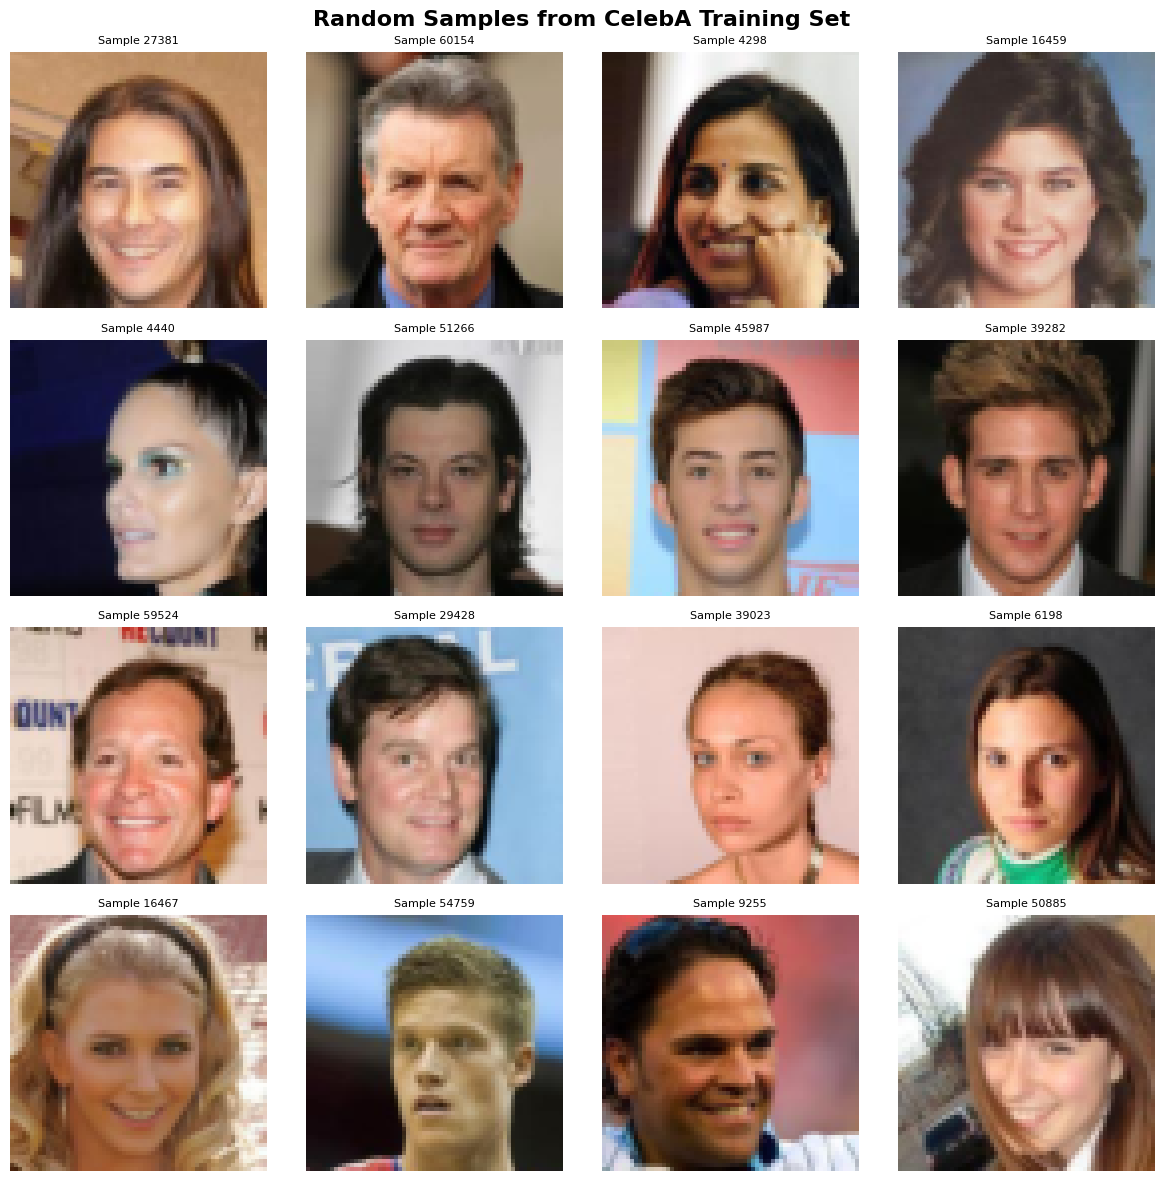

Successfully visualized 16 random training samples in a 4x4 grid


In [4]:
# Create figure and subplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
fig.suptitle("Random Samples from CelebA Training Set", fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# Display images
for idx, ax in enumerate(axes_flat):
    img = images[idx]
    
    # Display the image
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Sample {random_indices[idx]}', fontsize=8)

# Adjust spacing
plt.tight_layout()
plt.show()

print(f"Successfully visualized {num_samples} random training samples in a {grid_size}x{grid_size} grid")

In [5]:
import os

# Create figures directory if it doesn't exist
os.makedirs("figures", exist_ok=True)

# Save the current figure (8x8 grid from previous cell)

fig.savefig(f"../HW1_CMU_10799_Spring_2026/figures/celeba_samples_{grid_size}x{grid_size}.png", dpi=150, bbox_inches='tight')
print(f"Saved: figures/celeba_samples_{grid_size}x{grid_size}.png")

Saved: figures/celeba_samples_4x4.png


## Customize Grid Visualization

Generate additional grids with different configurations to explore the dataset.

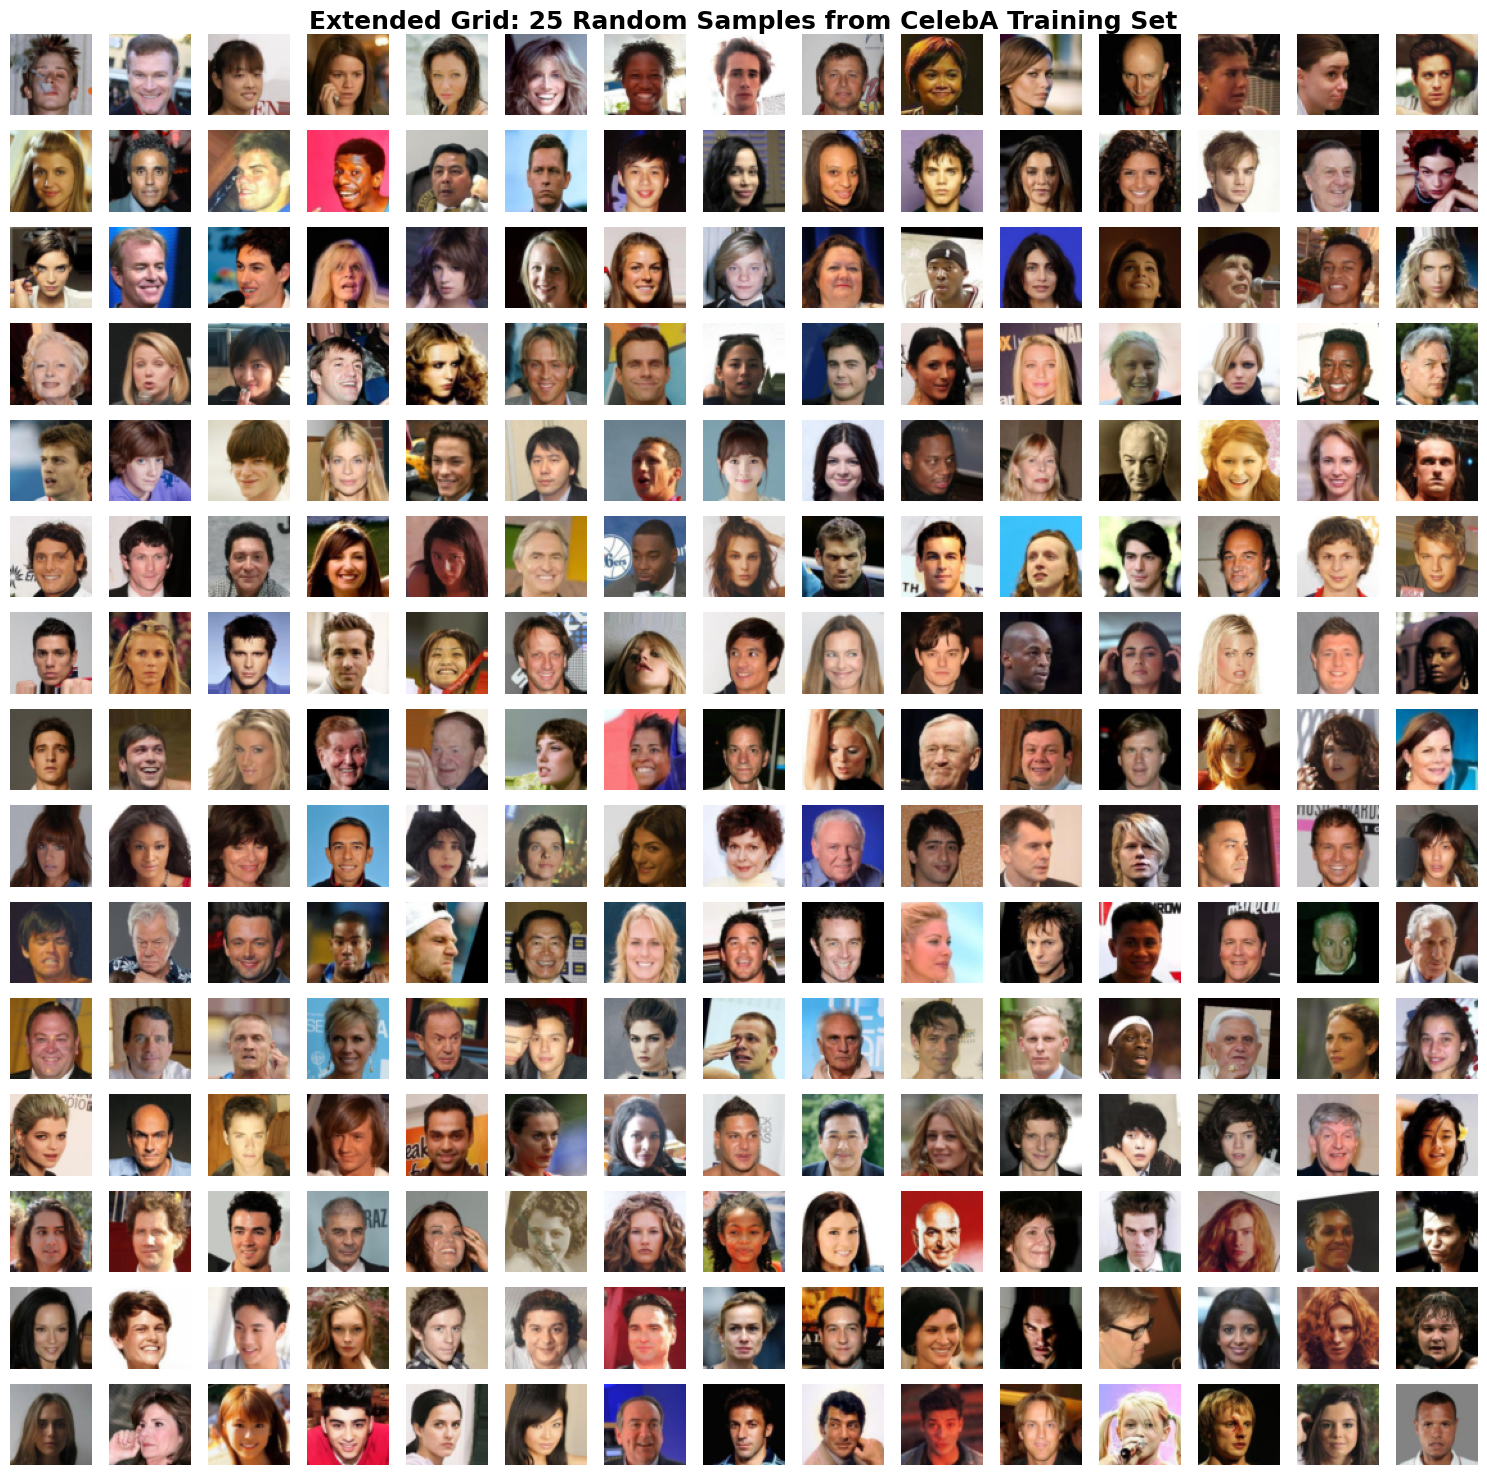

Successfully visualized 225 random training samples in a 15x15 grid


In [9]:
# Create a larger 5x5 grid (25 samples) for more variety
num_samples_large = 225
grid_size_large = 15

random_indices_large = random.sample(range(num_training_samples), num_samples_large)
images_large = [train_dataset[idx]["image"] for idx in random_indices_large]

fig, axes = plt.subplots(grid_size_large, grid_size_large, figsize=(15, 15))
fig.suptitle("Extended Grid: 25 Random Samples from CelebA Training Set", fontsize=18, fontweight='bold')

axes_flat = axes.flatten()

for idx, ax in enumerate(axes_flat):
    img = images_large[idx]
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

print(f"Successfully visualized {num_samples_large} random training samples in a {grid_size_large}x{grid_size_large} grid")

In [10]:
# Save the current figure (grid_size_largexgrid_size_large grid from previous cell)

fig.savefig(f"../HW1_CMU_10799_Spring_2026/figures/celeba_samples_{grid_size_large}x{grid_size_large}.png", dpi=150, bbox_inches='tight')
print(f"Saved: figures/celeba_samples_{grid_size_large}x{grid_size_large}.png")

Saved: figures/celeba_samples_15x15.png


In [8]:
# Create a summary of dataset statistics
print("\n" + "="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"Total training samples: {len(train_dataset):,}")
print(f"Image dimensions: {images[0].size}")
print(f"Image format: {type(images[0])}")
print(f"Image mode: {images[0].mode}")
print("="*60)

# Convert a sample image to numpy array to show pixel value ranges
sample_array = np.array(images[0])
print(f"\nSample image statistics:")
print(f"  Min pixel value: {sample_array.min()}")
print(f"  Max pixel value: {sample_array.max()}")
print(f"  Mean pixel value: {sample_array.mean():.2f}")
print(f"  Dtype: {sample_array.dtype}")


DATASET SUMMARY
Total training samples: 63,715
Image dimensions: (64, 64)
Image format: <class 'PIL.PngImagePlugin.PngImageFile'>
Image mode: RGB

Sample image statistics:
  Min pixel value: 3
  Max pixel value: 254
  Mean pixel value: 118.75
  Dtype: uint8
